In [1]:
import pandas as pd
import numpy as np
import os
import datetime

#### Read CSV Files

In [2]:
filepath= os.path.join('Resources','movies_2010_2011.csv')
df_10_11=pd.read_csv(filepath)
                  

In [3]:
filepath= os.path.join('Resources','movies_2012_2013.csv')
df_12_13=pd.read_csv(filepath)
                  

In [4]:
filepath= os.path.join('Resources','movies_2014.csv')
df_14=pd.read_csv(filepath)
                  

In [5]:
filepath= os.path.join('Resources','movies_2014_2015.csv')
df_14_15=pd.read_csv(filepath)
                  

In [6]:
filepath= os.path.join('Resources','movies_2016_2017.csv')
df_16_17=pd.read_csv(filepath)
                  

In [7]:
filepath= os.path.join('Resources','movies_2018_2019.csv')
df_18_19=pd.read_csv(filepath)
                  

In [8]:
filepath= os.path.join('Resources','movies.csv')
df_movies=pd.read_csv(filepath)
                  

#### Merging CSVs to make final dataset and cleaning data 

In [9]:
#Checking features from Kaggel dataset
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [10]:
#Checking features from OMDB dataset
df_14.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards',
       'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response',
       'totalSeasons'],
      dtype='object')

In [11]:
#joining 10 years OMDB data
frames = [df_10_11,df_12_13, df_14, df_14_15, df_16_17,df_18_19]

movie_df= pd.concat(frames)

In [12]:
movie_df.head(5)

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons,Error
0,0,Inception,2010,PG-13,16 Jul 2010,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",...,"2,223,702",tt1375666,movie,07 Dec 2010,"$292,576,195",NaN,NaN,True,NaN,NaN
1,1,Iron Man 2,2010,PG-13,07 May 2010,124 min,"Action, Adventure, Sci-Fi",Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",...,"771,885",tt1228705,movie,17 Aug 2010,"$312,433,331",NaN,NaN,True,NaN,NaN
2,2,Shutter Island,2010,R,19 Feb 2010,138 min,"Mystery, Thriller",Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo",...,"1,225,928",tt1130884,movie,08 Jun 2010,"$128,012,934",NaN,NaN,True,NaN,NaN
3,3,Scott Pilgrim vs. the World,2010,PG-13,13 Aug 2010,112 min,"Action, Comedy, Fantasy",Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...",...,"409,720",tt0446029,movie,09 Nov 2010,"$32,777,690",NaN,NaN,True,NaN,NaN
4,4,Grown Ups,2010,PG-13,25 Jun 2010,102 min,Comedy,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",...,"242,283",tt1375670,movie,09 Nov 2010,"$162,001,186",NaN,NaN,True,NaN,NaN


In [13]:
movie_df.shape

(2000, 28)

In [14]:
# drop unwanted columns
movie_df=movie_df.drop('Unnamed: 0',axis=1)

In [15]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1796 non-null   object 
 1   Year          1796 non-null   object 
 2   Rated         1774 non-null   object 
 3   Released      1796 non-null   object 
 4   Runtime       1795 non-null   object 
 5   Genre         1796 non-null   object 
 6   Director      1787 non-null   object 
 7   Writer        1791 non-null   object 
 8   Actors        1796 non-null   object 
 9   Plot          1796 non-null   object 
 10  Language      1794 non-null   object 
 11  Country       1795 non-null   object 
 12  Awards        1673 non-null   object 
 13  Poster        1796 non-null   object 
 14  Ratings       1796 non-null   object 
 15  Metascore     1698 non-null   float64
 16  imdbRating    1796 non-null   float64
 17  imdbVotes     1796 non-null   object 
 18  imdbID        1796 non-null  

In [16]:
#checking number of null values in each column 
movie_df.isnull().sum()

Title            204
Year             204
Rated            226
Released         204
Runtime          205
Genre            204
Director         213
Writer           209
Actors           204
Plot             204
Language         206
Country          205
Awards           327
Poster           204
Ratings          204
Metascore        302
imdbRating       204
imdbVotes        204
imdbID           204
Type             204
DVD              250
BoxOffice        247
Production      1991
Website         1999
Response           0
totalSeasons    1991
Error           1796
dtype: int64

In [17]:
#Taking some more extra features from kaggel dataset which are not present in OMDB dataset
df_movies=df_movies[['name', 'genre', 'star', 'budget', 'gross']]
df_movies=df_movies.rename(columns={'name':'Title'})


In [18]:
df_movies.columns

Index(['Title', 'genre', 'star', 'budget', 'gross'], dtype='object')

In [19]:
#merging OMDB dataset with extra features
movie_df=movie_df.merge(df_movies,on='Title',how='inner')
movie_df.shape

(1865, 31)

In [20]:
#Checking all column name on mergerd dataframe
movie_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
       'Error', 'genre', 'star', 'budget', 'gross'],
      dtype='object')

In [21]:
#dropping unwanted columns
movie_df=movie_df.drop(['Year','Genre','imdbID','Production','Website','Poster','Type','totalSeasons','Error'],axis=1)

In [22]:
#checking null values 
movie_df.isnull().sum()

Title           0
Rated          22
Released        0
Runtime         0
Director       10
Writer          4
Actors          0
Plot            0
Language        3
Country         1
Awards        120
Ratings         0
Metascore      96
imdbRating      0
imdbVotes       0
DVD            42
BoxOffice      39
Response        0
genre           0
star            0
budget        436
gross           8
dtype: int64

In [23]:
movie_df.shape

(1865, 22)

In [24]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 1864
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1865 non-null   object 
 1   Rated       1843 non-null   object 
 2   Released    1865 non-null   object 
 3   Runtime     1865 non-null   object 
 4   Director    1855 non-null   object 
 5   Writer      1861 non-null   object 
 6   Actors      1865 non-null   object 
 7   Plot        1865 non-null   object 
 8   Language    1862 non-null   object 
 9   Country     1864 non-null   object 
 10  Awards      1745 non-null   object 
 11  Ratings     1865 non-null   object 
 12  Metascore   1769 non-null   float64
 13  imdbRating  1865 non-null   float64
 14  imdbVotes   1865 non-null   object 
 15  DVD         1823 non-null   object 
 16  BoxOffice   1826 non-null   object 
 17  Response    1865 non-null   bool   
 18  genre       1865 non-null   object 
 19  star        1865 non-null  

In [25]:
# changing released column to date type
movie_df['Released'] = pd.to_datetime(movie_df['Released'], format='%d %b %Y')
movie_df['Released'].dtype

dtype('<M8[ns]')

In [26]:
# extracting year from released column as movie year
movie_df['year']=pd.DatetimeIndex(movie_df['Released']).year

In [27]:
movie_df['year'].value_counts()

2019    210
2015    209
2011    208
2012    197
2018    190
2014    166
2017    158
2010    155
2016    150
2013    123
1982      8
1984      8
2007      7
2020      7
1991      6
2004      5
1989      4
1988      4
1987      4
2006      4
2005      4
1990      4
1997      3
1995      3
1978      2
1939      2
1921      2
1992      2
1993      2
1994      2
1998      2
1999      2
2000      2
2003      2
1977      1
1976      1
1973      1
1971      1
1959      1
1955      1
1941      1
2021      1
Name: year, dtype: int64

In [28]:
movie_df=movie_df.loc[movie_df['year']>=2010,:]

In [29]:
movie_df.shape

(1774, 23)

In [30]:
#splitting strings of column runtime
movie_df['Runtime']=movie_df['Runtime'].str.split(' ').str[0]


In [32]:
# changing col dtypes
movie_df['Runtime']=pd.to_numeric(movie_df['Runtime'],errors='coerce')
movie_df['Metascore']=pd.to_numeric(movie_df['Metascore'],errors='coerce')
movie_df['imdbRating']=pd.to_numeric(movie_df['imdbRating'],errors='coerce')

In [33]:
movie_df['imdbVotes']=movie_df['imdbVotes'].apply(lambda x:int(x.replace(',','')))

In [38]:
movie_df['BoxOffice']=movie_df['BoxOffice'].str.replace('$','').replace(to_replace=',',value='', regex = True)

In [ ]:
movie_df['BoxOffice']=

In [527]:
# making col for internet_movie_database_rating
movie_df1=movie_df.copy()
movie_df['internet_movie_database_rating']= movie_df1['Ratings']\
    .apply(lambda x: float(x.split(',')[1].split(':')[1].replace('\'','').replace('}','').strip().split('/')[0]))


In [528]:
def rotten_tomato(x):
    score_array= x.split(',')
    if " {'Source': 'Rotten Tomatoes'" in score_array:
        score_index=score_array.index(" {'Source': 'Rotten Tomatoes'")+1
        
        return float(score_array[score_index].split(':')[1].replace('}','').strip().replace('%','').replace('\'','').replace(']',''))
    else:
        return 0
movie_df2= movie_df.copy()      
movie_df['rotten_tomato_rating']= movie_df2['Ratings'].apply(rotten_tomato)  


In [529]:
def metacritic(x):
    score_array= x.split(',')
    if " {'Source': 'Metacritic'" in score_array:
        score_index=score_array.index(" {'Source': 'Metacritic'")+1
        
        return float(score_array[score_index].split(':')[1].replace('}','').replace(']','').split('/')[0].strip().replace('\'',''))
    else:
        return 0
movie_df3= movie_df.copy()      
movie_df['metacritic_rating']= movie_df3['Ratings'].apply(metacritic)  
    

In [530]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 0 to 1864
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Title                           1774 non-null   object        
 1   Rated                           1753 non-null   object        
 2   Released                        1774 non-null   datetime64[ns]
 3   Runtime                         1774 non-null   int64         
 4   Director                        1766 non-null   object        
 5   Writer                          1771 non-null   object        
 6   Actors                          1774 non-null   object        
 7   Plot                            1774 non-null   object        
 8   Language                        1771 non-null   object        
 9   Country                         1773 non-null   object        
 10  Awards                          1654 non-null   object        
 11  Rati

In [531]:
movie_df=movie_df.drop('Ratings',axis=1)

In [532]:
movie_df.head(5)

,Title,Rated,Released,Runtime,Director,Writer,Actors,Plot,Language,Country,...,BoxOffice,Response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,NaN,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,NaN,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,...,NaN,True,Mystery,Leonardo DiCaprio,80000000.0,294805697.0,2010,8.2,68.0,63.0
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",...,NaN,True,Action,Michael Cera,60000000.0,48917974.0,2010,7.5,82.0,69.0
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,...,NaN,True,Comedy,Adam Sandler,80000000.0,271457301.0,2010,6.0,11.0,30.0


In [533]:
# changing all column header to lower case
movie_df.columns = [x.lower() for x in movie_df.columns]

In [534]:
#making clean csv 
movie_df.to_csv('cleaned_data.csv',index=False)

In [535]:
#Searching for most used words in title and plot
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.display import Image, HTML

title_corpus = ' '.join(movie_df['title'])
plot_corpus = ' '.join(movie_df['plot'])

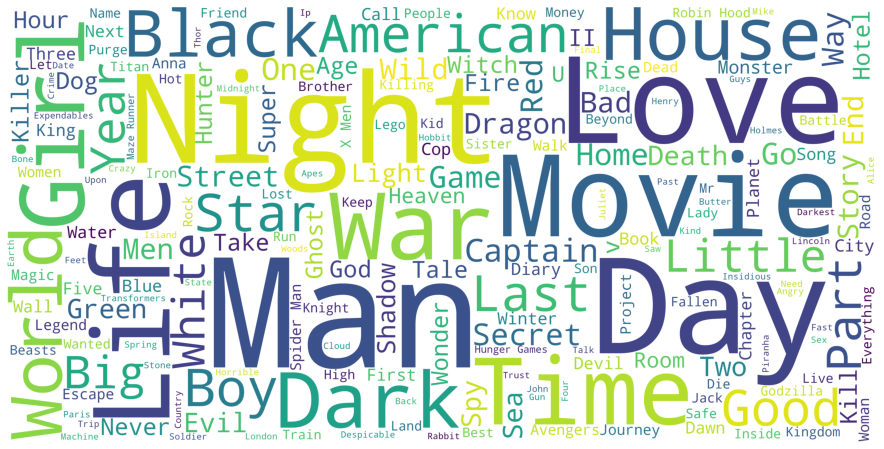

In [536]:
# plotting wordclod for title

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

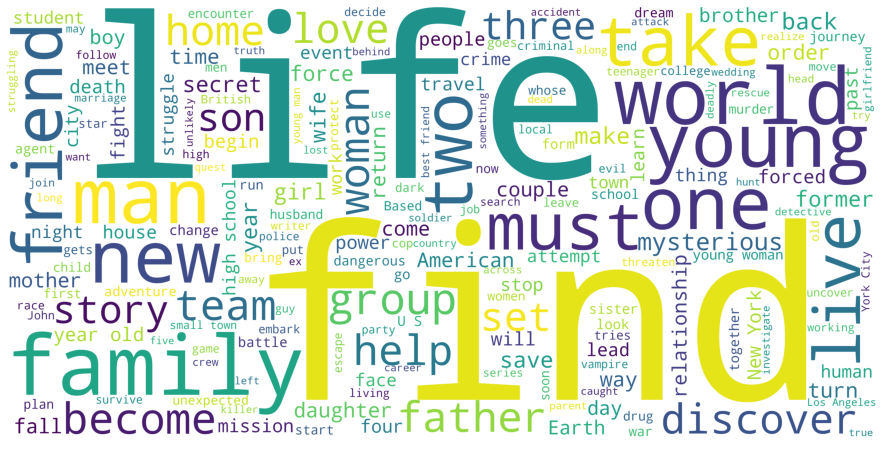

In [251]:
#plotting word cloud fot movie plots

plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(plot_corpus)
plt.figure(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.show()